# COVID-19 Data Analysis Project

This project analyzes and visualizes the impact of COVID-19 across countries and explores its relationship with worldwide happiness indicators. Using real-world datasets.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the COVID-19 and Happiness datasets
covid_df = pd.read_csv('../covid19_Confirmed_dataset.csv')
happy_df = pd.read_csv('../worldwide_happiness_report.csv')

print('COVID-19 dataset shape:', covid_df.shape)
print('Happiness dataset shape:', happy_df.shape)
covid_df.head(), happy_df.head()

COVID-19 dataset shape: (266, 104)
Happiness dataset shape: (156, 9)


(  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
 0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
 1            NaN        Albania  41.1533  20.1683        0        0        0   
 2            NaN        Algeria  28.0339   1.6596        0        0        0   
 3            NaN        Andorra  42.5063   1.5218        0        0        0   
 4            NaN         Angola -11.2027  17.8739        0        0        0   
 
    1/25/20  1/26/20  1/27/20  ...  4/21/20  4/22/20  4/23/20  4/24/20  \
 0        0        0        0  ...     1092     1176     1279     1351   
 1        0        0        0  ...      609      634      663      678   
 2        0        0        0  ...     2811     2910     3007     3127   
 3        0        0        0  ...      717      723      723      731   
 4        0        0        0  ...       24       25       25       25   
 
    4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  
 0     

## Data Exploration & Cleaning

Let's explore the structure and contents of both datasets, check for missing values, and prepare the data for analysis and merging.

In [3]:
# Explore COVID-19 dataset
print('COVID-19 Dataset Info:')
covid_df.info()
print('\nMissing values in COVID-19 dataset:')
print(covid_df.isnull().sum())

# Explore Happiness dataset
print('\nHappiness Dataset Info:')
happy_df.info()
print('\nMissing values in Happiness dataset:')
print(happy_df.isnull().sum())

COVID-19 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 104 entries, Province/State to 4/30/20
dtypes: float64(2), int64(100), object(2)
memory usage: 216.3+ KB

Missing values in COVID-19 dataset:
Province/State    184
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/26/20             0
4/27/20             0
4/28/20             0
4/29/20             0
4/30/20             0
Length: 104, dtype: int64

Happiness Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4 

In [4]:
# Data Cleaning and Preprocessing

# For COVID-19: Aggregate by country (sum over provinces/states if needed)
covid_grouped = covid_df.groupby('Country/Region').sum(numeric_only=True)
covid_grouped = covid_grouped.drop(['Lat', 'Long'], axis=1, errors='ignore')
covid_grouped['TotalCases'] = covid_grouped.iloc[:, -1]  # Use the last date as total cases
covid_grouped = covid_grouped[['TotalCases']]
covid_grouped = covid_grouped.reset_index()

# For Happiness: Standardize country column name for merging
if 'Country' in happy_df.columns:
    happy_df.rename(columns={'Country': 'Country/Region'}, inplace=True)
elif 'Country or region' in happy_df.columns:
    happy_df.rename(columns={'Country or region': 'Country/Region'}, inplace=True)

# Preview cleaned data
display(covid_grouped.head())
display(happy_df.head())

,Country/Region,TotalCases
0,Afghanistan,2171
1,Albania,773
2,Algeria,4006
3,Andorra,745
4,Angola,27


,Overall rank,Country/Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Exploratory Data Analysis (EDA)

Let's visualize and analyze trends in COVID-19 cases and happiness indicators, and explore their relationships.

C:\Users\User\AppData\Local\Temp\ipykernel_3528\1391224824.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalCases', y='Country/Region', data=top10, palette='Reds_r')


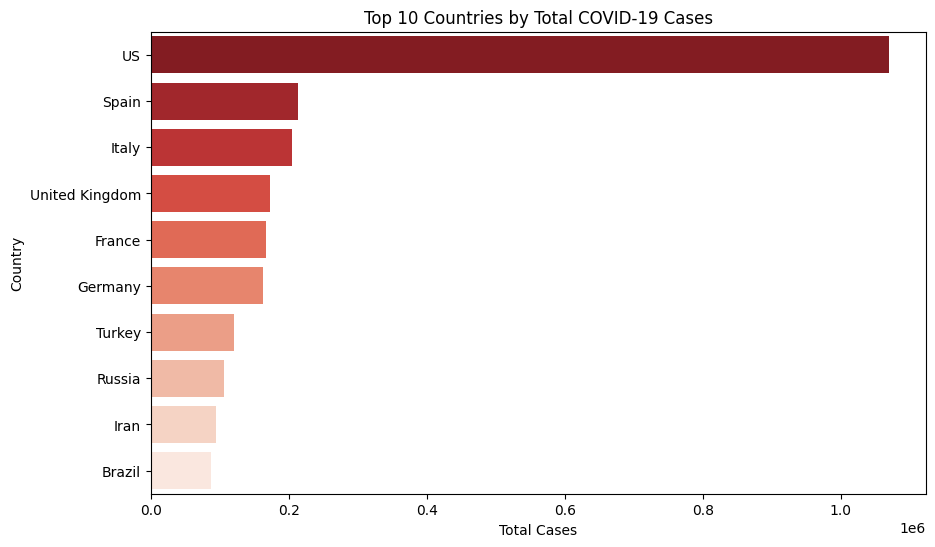

In [5]:
# Top 10 countries by total COVID-19 cases
plt.figure(figsize=(10,6))
top10 = covid_grouped.sort_values('TotalCases', ascending=False).head(10)
sns.barplot(x='TotalCases', y='Country/Region', data=top10, palette='Reds_r')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.show()

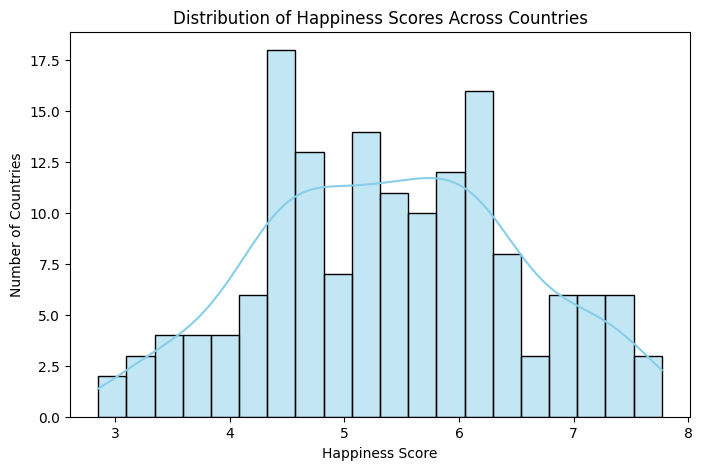

In [6]:
# Distribution of Happiness Scores
plt.figure(figsize=(8,5))
sns.histplot(happy_df['Score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Happiness Scores Across Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Number of Countries')
plt.show()

In [7]:
# Merge the datasets on country name
merged_df = pd.merge(happy_df, covid_grouped, on='Country/Region', how='inner')
print('Merged dataset shape:', merged_df.shape)
display(merged_df.head())

Merged dataset shape: (143, 10)


,Overall rank,Country/Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,TotalCases
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,4995
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,9356
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7738
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1797
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,39512


Correlation matrix:


,Score,GDP per capita,Healthy life expectancy,Social support,TotalCases
Score,1.000000,0.793847,0.799893,0.788591,0.285735
GDP per capita,0.793847,1.000000,0.863062,0.759468,0.329048
Healthy life expectancy,0.799893,0.863062,1.000000,0.765286,0.341900
Social support,0.788591,0.759468,0.765286,1.000000,0.241549
TotalCases,0.285735,0.329048,0.341900,0.241549,1.000000


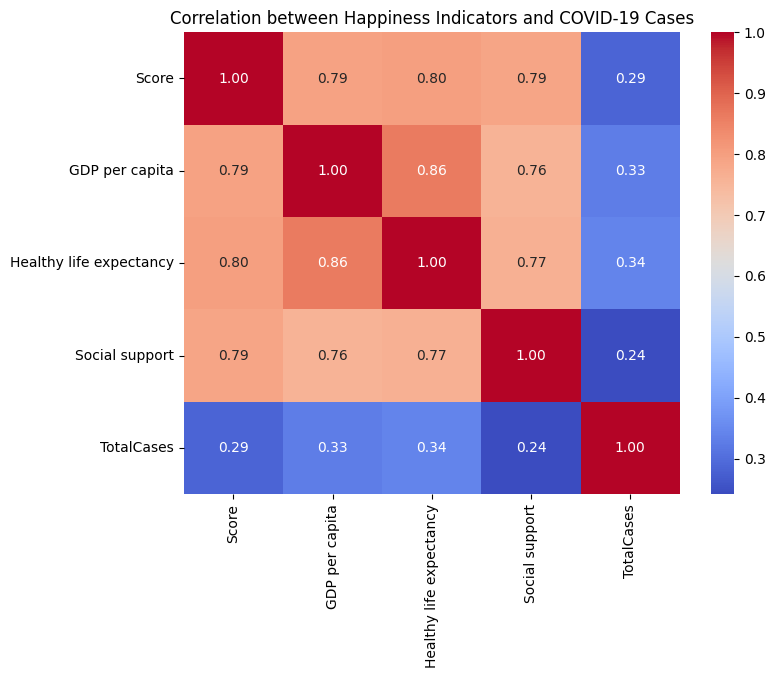

In [9]:
# Correlation analysis between happiness indicators and COVID-19 cases

# Select relevant columns for correlation
cols = ['Score', 'GDP per capita', 'Healthy life expectancy', 'Social support', 'TotalCases']
correlation = merged_df[cols].corr()

# Show correlation matrix
print('Correlation matrix:');
display(correlation)

# Visualize correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Happiness Indicators and COVID-19 Cases')
plt.show()